## EM(Expectation Maximization) ##

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

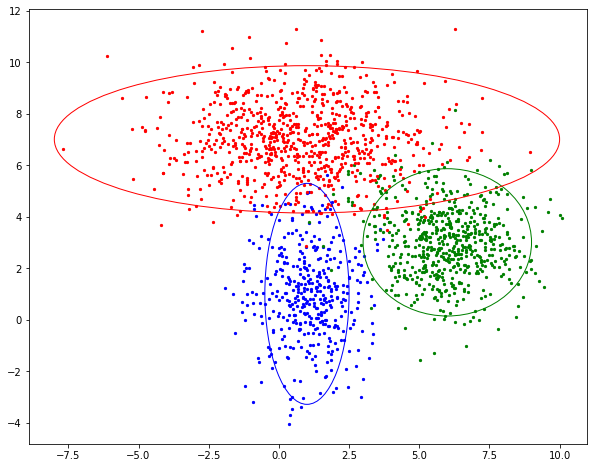

In [2]:
me = [[1,1],[6,3],[1,7]]
var = [[1,3],[2,2],[6,2]]
X1 = np.random.multivariate_normal(me[0], np.diag(var[0]), 400)
X2 = np.random.multivariate_normal(me[1], np.diag(var[1]), 600)
X3 = np.random.multivariate_normal(me[2], np.diag(var[2]), 800)
X = np.vstack((X1, X2, X3))
plt.figure(figsize=(10, 8))
plt.scatter(X1[:, 0], X1[:, 1], s=5, color = 'b')
plt.scatter(X2[:, 0], X2[:, 1], s=5, color = 'g')
plt.scatter(X3[:, 0], X3[:, 1], s=5, color = 'r')
colors = ['b', 'g', 'r']
ax = plt.gca()
for i in range(3):
        ellipse = Ellipse(me[i], 3 * var[i][0], 2.86 * var[i][1],fill = 0, ec = colors[i],ls = '-')
        ax.add_patch(ellipse)

### Multivariate normal distribution PDF ###
$$ f(x) = \frac{1} {\sqrt{(2 \pi)^{k} \begin{vmatrix} \Sigma \end{vmatrix}}}exp(- \frac{1}{2}(x- \mu)^{T} \Sigma^{-1}(x- \mu)) $$

In [3]:
def norm2d_pdf(x,m,v):
    x = np.array(x)
    m = np.array(m)
    v = np.array(v)
    f = np.zeros(x.shape[0])
    r = np.linalg.pinv(np.diag(v))
    for i in range(x.shape[1]):
        x[:,i] -= m[i]
    coef1 = 1/(np.linalg.det(np.diag(v))*(2*math.pi)**2)**0.5
    for i in range(x.shape[0]):
        f[i] = coef1 * np.exp(np.array((x[i].T.dot(r)).dot(x[i]))/(-2))
    #f = 1/(2*math.pi*v[0]*v[1]*(1-r**2)**0.5)*np.exp(-((((x[0]-m[0])** 2)/v[0]**2)+(((x[1]-m[1])**2)/v[1]**2)-((2*r*(x[0]-m[0])*(x[1]-m[1]))/(v[0]*v[1])))/(2*(1-r**2)))
    #f = 1 / (2 * math.pi * v[0] * v[1]) * np.exp(-((((x[0] - m[0]) ** 2)/v[0] ** 2)+(((x[1] - m[1]) ** 2)/v[1]**2))/2)
    return f

### Expectation ###
$$ W_{jk} = \frac{\phi(y_{j}|\theta_{k})}{\sum_{k=1}^{K}\phi(y_{j}|\theta_{k})} $$

In [4]:
def Expectation(X,Mu,Var,Pi,n_clusters):    
    pdfs = np.zeros(((X.shape[0], n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * norm2d_pdf(X,Mu[i],Var[i])
    W = pdfs/pdfs.sum(axis=1).reshape(-1,1)
    Pi = W.sum(axis = 0)/ W.sum()
    return W,Pi

### Maxization ###
$$ \mu_{k} = \frac{\sum_{j=1}^{N}W_{jk}y_{j}}{\sum_{j=1}^{N}W_{jk}} $$
$$ \sigma_{k}^{2} = \frac{\sum_{j=1}^{N}W_{jk}(y_{j}-\mu_{k})}{\sum_{j=1}^{N}W_{j}} $$

In [5]:
def Maximization(X,W,n_clusters):
    for i in range(n_clusters):
        Mu[i] = np.average(X, axis=0, weights=W[:, i])
    for i in range(n_clusters):
        Var[i] = np.average((X - Mu[i]) ** 2, axis=0, weights=W[:, i])
    return Mu,Var

In [6]:
n_clusters = 3
Mu = [[0, 0], [3, 0], [0, 4]]
Var = [[1, 1], [1, 1], [1, 1]]
Pi = [1 / n_clusters] * 3
W = np.ones((X.shape[0], n_clusters)) / n_clusters 
Pi = W.sum(axis=0) / W.sum()
for i in range(15):
    W,Pi = Expectation(X,Mu,Var,Pi,n_clusters)
    Mu,Var = Maximization(X,W,n_clusters)

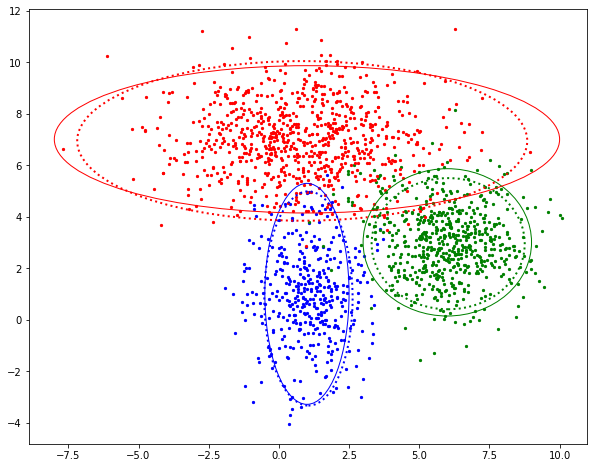

In [7]:
colors = ['b', 'g', 'r']
plt.figure(figsize=(10, 8))
plt.scatter(X1[:, 0], X1[:, 1], s=5, color = 'b')
plt.scatter(X2[:, 0], X2[:, 1], s=5, color = 'g')
plt.scatter(X3[:, 0], X3[:, 1], s=5, color = 'r')
ax = plt.gca()
for i in range(n_clusters):
        ellipse = Ellipse(me[i], 3 * var[i][0], 2.86 * var[i][1],fill = 0, ec = colors[i],ls = '-')
        ax.add_patch(ellipse)
for i in range(n_clusters):
        plot_args = {'fc': 'None', 'lw': 2, 'edgecolor': colors[i], 'ls': ':'}
        ellipse = Ellipse(Mu[i], 2.86  * Var[i][0], 2.86  * Var[i][1], **plot_args)
        ax.add_patch(ellipse)

In [8]:
print('Accuracy:',((W.argmax(axis = 1)[0:400] == 0).sum() +\
(W.argmax(axis = 1)[400:1000] == 1).sum() +\
(W.argmax(axis = 1)[1000:1800] == 2).sum())/18,'%')

Accuracy: 95.83333333333333 %


## Iris Set ##

In [9]:
from sklearn import datasets
irisset = datasets.load_iris()
irissettarget = np.array(irisset.target)
irisset = np.array(irisset.data)

In [10]:
n_clusters = 3
Mu = [[5,3.5,1.5,0.2], [6,2.7,4.2,1.3], [6.5,3,5.5,2]]
Var = [[1,1,1,1], [1,1,1,1], [1,1,1,1]]
Pi = [1 / n_clusters] * 3
W = np.ones((irisset.shape[0], n_clusters)) / n_clusters 
Pi = W.sum(axis=0) / W.sum()
for i in range(15):
    W,Pi = Expectation(irisset,Mu,Var,Pi,n_clusters)
    Mu,Var = Maximization(irisset,W,n_clusters)

In [11]:
print('Accuracy:',(W.argmax(axis = 1) == irissettarget).sum()/1.5,'%')

Accuracy: 94.66666666666667 %


In [ ]:
m = [1,4,8]
v = [1,0.5,1.5]
X1 = np.random.normal(m[0], v[0], 40)
X2 = np.random.normal(m[1], v[1], 60)
X3 = np.random.normal(m[2], v[2], 80)
X = np.hstack((X1,X2,X3))
m = [1,4,8]
v = [1,0.5,1.5]
X1 = np.random.normal(m[0], v[0], 40)
X2 = np.random.normal(m[1], v[1], 60)
X3 = np.random.normal(m[2], v[2], 80)
X = np.hstack((X1,X2,X3))
plt.plot([m[0]-2.96*v[0],m[0]+2.96*v[0]],[0.13,0.13])
plt.plot([m[1]-2.96*v[1],m[1]+2.96*v[1]],[0.23,0.23])
plt.plot([m[2]-2.96*v[2],m[2]+2.96*v[2]],[0.33,0.33])
plt.figure(figsize=(12, 2))
plt.scatter(X1, np.full_like(X1, 0.1), s=1, color = 'b')
plt.scatter(X2, np.full_like(X2, 0.2), s=1, color = 'g')
plt.scatter(X3, np.full_like(X3, 0.3), s=1, color = 'r')
plt.plot([m[0]-2.96*v[0],m[0]+2.96*v[0]],[0.13,0.13],color = 'b')
plt.plot([m[1]-2.96*v[1],m[1]+2.96*v[1]],[0.23,0.23],color = 'g')
plt.plot([m[2]-2.96*v[2],m[2]+2.96*v[2]],[0.33,0.33],color = 'r')
[<matplotlib.lines.Line2D at 0x1d6ae4f8250>]

n_clusters = 3
me = [0.5,3,5]
var = [1,1,1]
Pi = [1 / n_clusters] * 3
W = np.ones((n_points, n_clusters)) / n_clusters 
Pi = W.sum(axis=0) / W.sum()
norm_pdf
def norm_pdf(x,m,v):
    coef = 1/(v * (2 * math.pi) ** 0.5)
    f = coef * np.exp(((x-m) ** 2)/(2 * v ** 2))
    return f
def Expectation(X,Mu,Var,Pi,n_clusters):    
    pdfs = np.zeros(((X.shape[0], n_clusters)))
    for i in range(n_clusters):
        pdfs[:, i] = Pi[i] * norm_pdf(X,Mu[i],Var[i])
    W = pdfs/pdfs.sum(axis=1).reshape(-1,1)
    Pi = W.sum(axis = 0)/ W.sum()
    return W,Pi
for i in range(2):
    W,Pi = Expectation(X,me,var,Pi,n_clusters)
    me,var = Maximization(X,W,n_clusters)
plt.plot([m[0]-2.96*v[0],m[0]+2.96*v[0]],[0.13,0.13],color = 'b')
plt.plot([m[1]-2.96*v[1],m[1]+2.96*v[1]],[0.23,0.23],color = 'g')
plt.plot([m[2]-2.96*v[2],m[2]+2.96*v[2]],[0.33,0.33],color = 'r')
plt.figure(figsize=(12, 2))
plt.scatter(X1, np.full_like(X1, 0.1), s=1, color = 'b')
plt.scatter(X2, np.full_like(X2, 0.2), s=1, color = 'g')
plt.scatter(X3, np.full_like(X3, 0.3), s=1, color = 'r')
plt.plot([m[0]-2.96*v[0],m[0]+2.96*v[0]],[0.13,0.13],color = 'b')
plt.plot([m[1]-2.96*v[1],m[1]+2.96*v[1]],[0.23,0.23],color = 'g')
plt.plot([m[2]-2.96*v[2],m[2]+2.96*v[2]],[0.33,0.33],color = 'r')
plt.plot([me[0]-2.96*var[0],me[0]+2.96*var[0]],[0.16,0.16],color = 'b')
plt.plot([me[1]-2.96*var[1],me[1]+2.96*var[1]],[0.26,0.26],color = 'g')
plt.plot([me[2]-2.96*var[2],me[2]+2.96*var[2]],[0.36,0.36],color = 'r')